In [1]:
import sys
print(sys.executable)

/usr/bin/python3


### Import des bibliothèques

In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, mean,when
from pyspark.sql.types import IntegerType, DoubleType, BooleanType
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Initialiser Spark
spark = SparkSession.builder \
    .appName("EDA Catalogue") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/01/18 19:14:36 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Chargement des données brutes

In [4]:
# Charger les données brutes
catalogue = spark.read.csv("data/raw/Catalogue.csv", header=True, inferSchema=True)

### Nettoyage des données

In [5]:
# Afficher les premières lignes
print("Aperçu des données brutes:")
catalogue.show(5)

Aperçu des données brutes:
+------+------+---------+-----------+--------+--------+-------+--------+-----+
|marque|   nom|puissance|   longueur|nbPlaces|nbPortes|couleur|occasion| prix|
+------+------+---------+-----------+--------+--------+-------+--------+-----+
| Volvo|S80 T6|      272|très longue|       5|       5|  blanc|   false|50500|
| Volvo|S80 T6|      272|très longue|       5|       5|   noir|   false|50500|
| Volvo|S80 T6|      272|très longue|       5|       5|  rouge|   false|50500|
| Volvo|S80 T6|      272|très longue|       5|       5|   gris|    true|35350|
| Volvo|S80 T6|      272|très longue|       5|       5|   bleu|    true|35350|
+------+------+---------+-----------+--------+--------+-------+--------+-----+
only showing top 5 rows



In [6]:
# Vérification des types de données
print("\nInformations sur les données:")
catalogue.printSchema()


Informations sur les données:
root
 |-- marque: string (nullable = true)
 |-- nom: string (nullable = true)
 |-- puissance: integer (nullable = true)
 |-- longueur: string (nullable = true)
 |-- nbPlaces: integer (nullable = true)
 |-- nbPortes: integer (nullable = true)
 |-- couleur: string (nullable = true)
 |-- occasion: boolean (nullable = true)
 |-- prix: integer (nullable = true)



In [9]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne:")
catalogue.select([count(when(col(c).isNull(), c)).alias(c) for c in catalogue.columns]).show()


Valeurs manquantes par colonne:
+------+---+---------+--------+--------+--------+-------+--------+----+
|marque|nom|puissance|longueur|nbPlaces|nbPortes|couleur|occasion|prix|
+------+---+---------+--------+--------+--------+-------+--------+----+
|     0|  0|        0|       0|       0|       0|      0|       0|   0|
+------+---+---------+--------+--------+--------+-------+--------+----+



In [10]:
# Compter les occurrences pour chaque colonne de type 'string'
for col_name in catalogue.columns:
    if dict(catalogue.dtypes)[col_name] == 'string':
        print(f"Valeurs uniques pour {col_name}:")
        catalogue.groupBy(col_name).count().show()

Valeurs uniques pour marque:
+----------+-----+
|    marque|count|
+----------+-----+
|Volkswagen|   40|
|   Peugeot|   10|
|    Jaguar|   10|
|    Lancia|   10|
|      Mini|   10|
|       Kia|    5|
|     Volvo|   10|
|      Saab|   10|
|     Honda|    5|
|      Audi|   20|
|      Seat|    5|
|  Mercedes|   20|
|   Renault|   40|
|       BMW|   20|
|     Dacia|    5|
|     Skoda|    5|
|  Daihatsu|    5|
|   Hyundaï|    5|
|    Nissan|   15|
|      Fiat|   10|
+----------+-----+
only showing top 20 rows

Valeurs uniques pour nom:
+--------------+-----+
|           nom|count|
+--------------+-----+
|   Polo 1.2 6V|   10|
|    Matrix 1.6|    5|
|    Mondeo 1.8|   10|
|        S80 T6|   10|
|     Cuore 1.0|    5|
|      9.3 1.8T|   10|
|      FR-V 1.7|    5|
| X-Type 2.5 V6|   10|
|  Golf 2.0 FSI|   10|
|      1007 1.4|   10|
|   Primera 1.6|    5|
|   Espace 2.0T|   10|
|        A2 1.4|   10|
| Maxima 3.0 V6|    5|
|   Picanto 1.1|    5|
|     Croma 2.2|   10|
|Copper 1.6 16V|   10|
|  

In [11]:
# Recherche des doublons
duplicates = catalogue.count() - catalogue.dropDuplicates().count()
print(f"\nNombre de doublons : {duplicates}")


Nombre de doublons : 0


In [12]:
# Suppression des doublons
catalogue = catalogue.dropDuplicates()

In [13]:
# Statistiques descriptives
catalogue.describe().show()

25/01/18 19:17:10 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------+---------------+------------------+-----------+------------------+------------------+-------+------------------+
|summary|marque|            nom|         puissance|   longueur|          nbPlaces|          nbPortes|couleur|              prix|
+-------+------+---------------+------------------+-----------+------------------+------------------+-------+------------------+
|  count|   270|            270|               270|        270|               270|               270|    270|               270|
|   mean|  NULL|           NULL|157.59259259259258|       NULL| 5.222222222222222| 4.814814814814815|   NULL|26668.055555555555|
| stddev|  NULL|           NULL|  90.5512893580533|       NULL|0.6297065660731499|0.5807978768533857|   NULL|19050.121111555487|
|    min|  Audi|       1007 1.4|                55|     courte|                 5|                 3|  blanc|              7500|
|    max| Volvo|Ypsilon 1.4 16V|               507|très longue|                 7|               

### Visualisation des données

In [14]:
# Visualisation des données (nécessite la conversion en Pandas)
catalogue_pd = catalogue.toPandas()

/tmp/ipykernel_2378/3469973832.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='marque', y='puissance', data=catalogue_pd, palette="viridis")


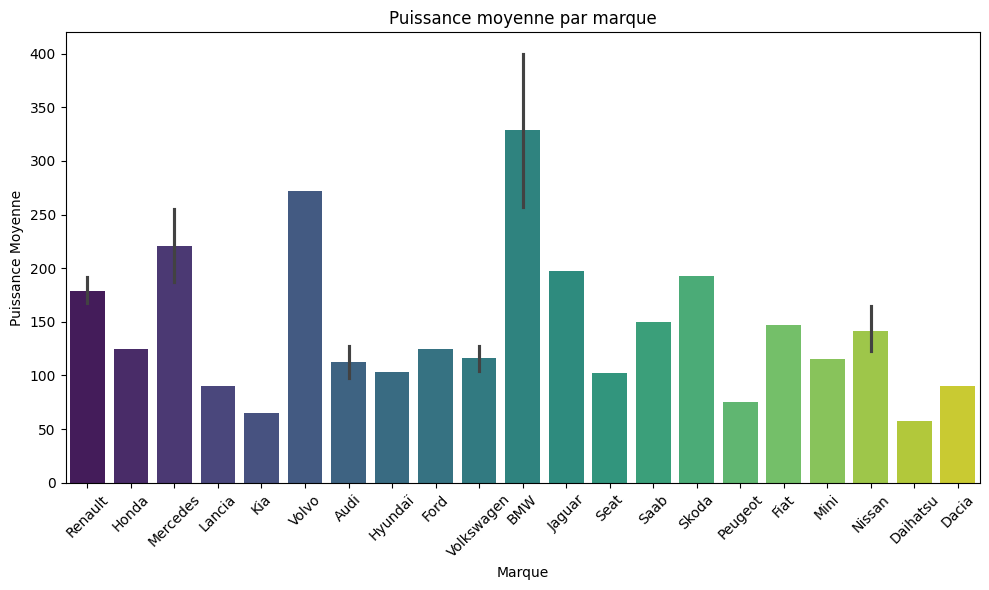

In [15]:
# Analyse des variables catégoriques
if 'marque' in catalogue_pd.columns and 'puissance' in catalogue_pd.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='marque', y='puissance', data=catalogue_pd, palette="viridis")
    plt.title('Puissance moyenne par marque')
    plt.xlabel('Marque')
    plt.ylabel('Puissance Moyenne')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_2378/2360715965.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nom', y='puissance', data=catalogue_pd, palette="viridis")


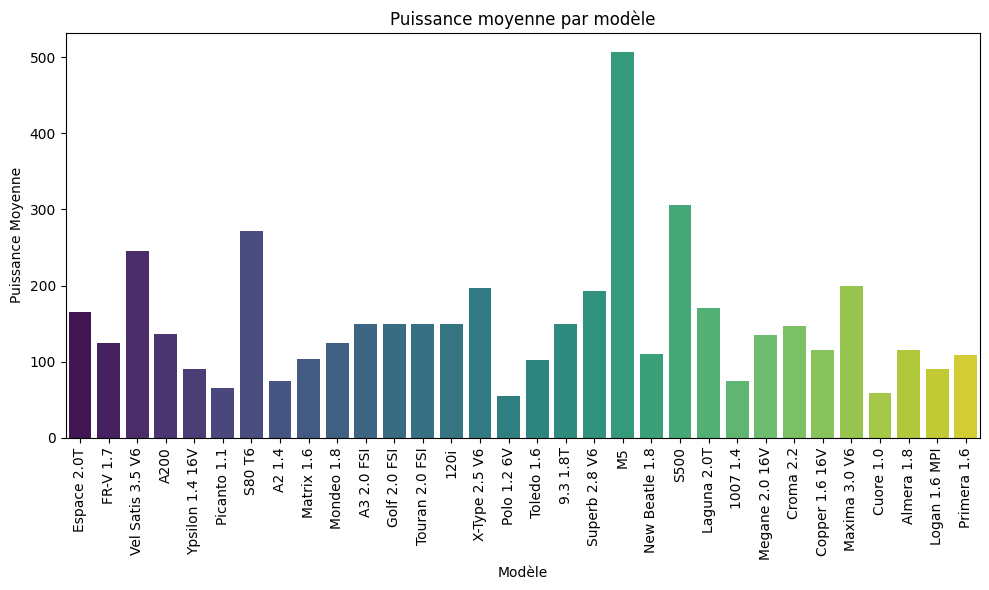

In [16]:
if 'nom' in catalogue_pd.columns and 'puissance' in catalogue_pd.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='nom', y='puissance', data=catalogue_pd, palette="viridis")
    plt.title('Puissance moyenne par modèle')
    plt.xlabel('Modèle')
    plt.ylabel('Puissance Moyenne')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

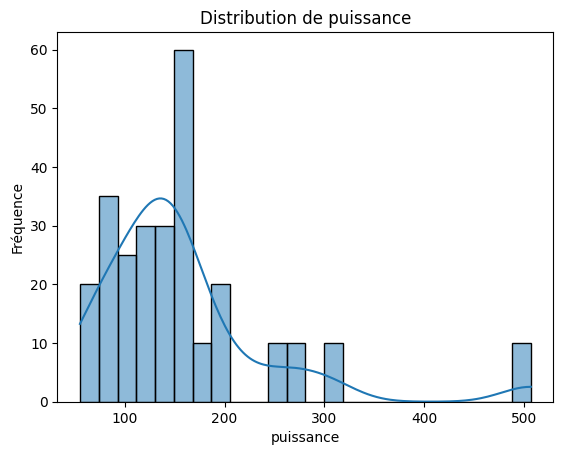

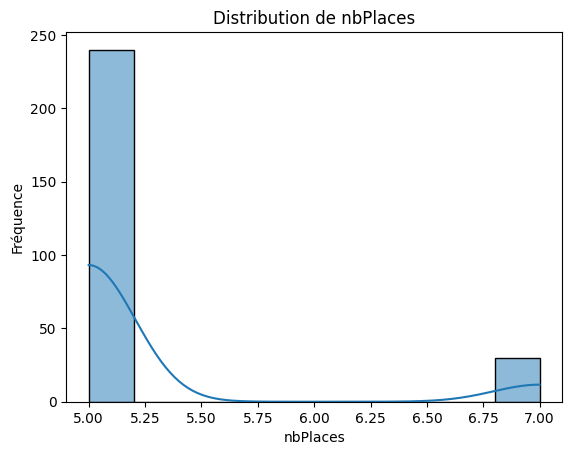

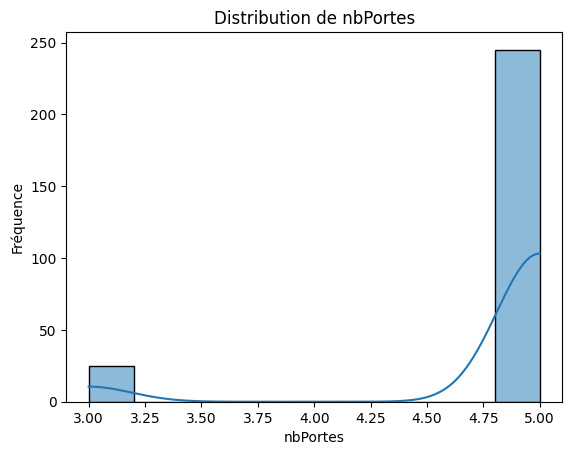

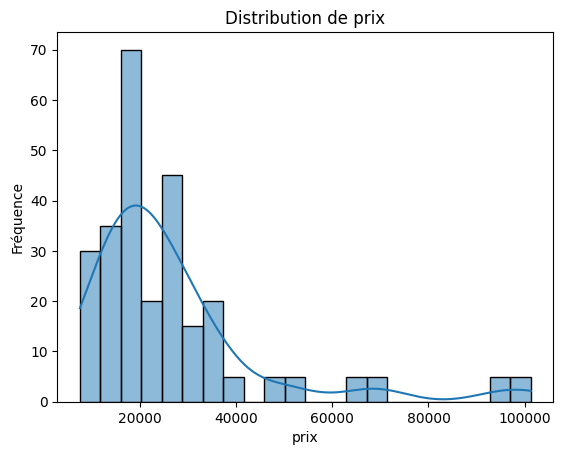

In [19]:
# Histogrammes pour les variables numériques
num_cols = [f.name for f in catalogue.schema.fields if isinstance(f.dataType, (IntegerType, DoubleType))]
for col_name in num_cols:
    plt.figure()
    sns.histplot(catalogue_pd[col_name], kde=True)
    plt.title(f'Distribution de {col_name}')
    plt.xlabel(col_name)
    plt.ylabel('Fréquence')
    plt.show()

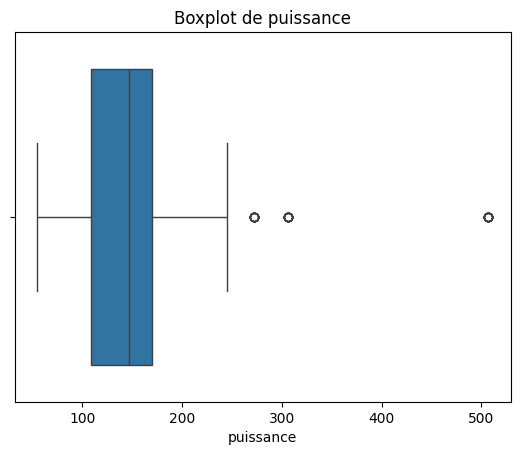

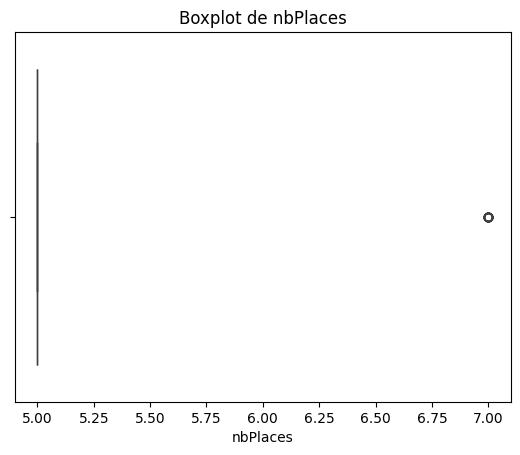

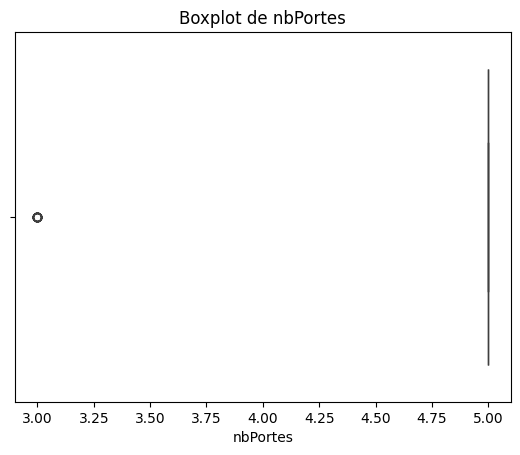

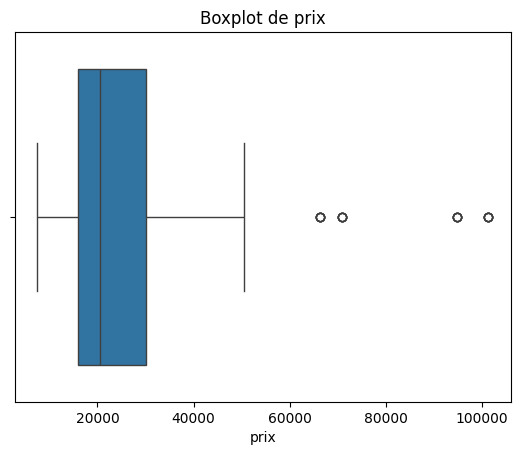

In [20]:
# Boxplots pour détecter les outliers
for col_name in num_cols:
    plt.figure()
    sns.boxplot(x=catalogue_pd[col_name])
    plt.title(f'Boxplot de {col_name}')
    plt.show()

In [21]:
# Encodage ordinal de la colonne 'longueur'
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="longueur", outputCol="longueur_index", stringOrderType="alphabetAsc")
catalogue = indexer.fit(catalogue).transform(catalogue)

In [22]:
# Séparer les voitures neuves et d'occasion
catalogue_new = catalogue.filter(col("occasion") == False)
catalogue_occasion = catalogue.filter(col("occasion") == True)

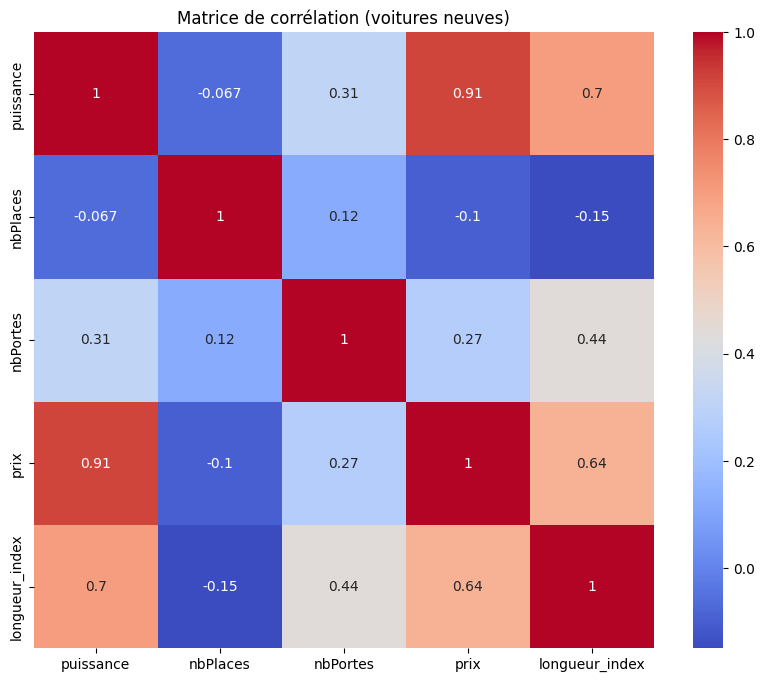

In [24]:
# Matrice de corrélation pour les voitures neuves
num_cols = [f.name for f in catalogue_new.schema.fields if isinstance(f.dataType, (IntegerType, DoubleType))]
corr_matrix_new = catalogue_new.select(num_cols).toPandas().corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_new, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation (voitures neuves)')
plt.show()

In [25]:
# Matrice de corrélation pour toutes les voitures
corr_matrix_all = catalogue.select(num_cols).toPandas().corr()

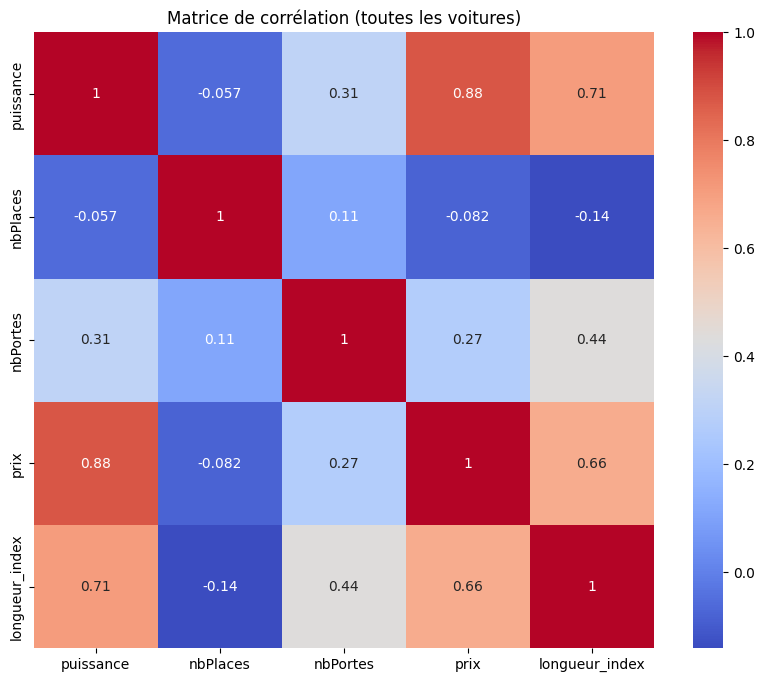

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation (toutes les voitures)')
plt.show()

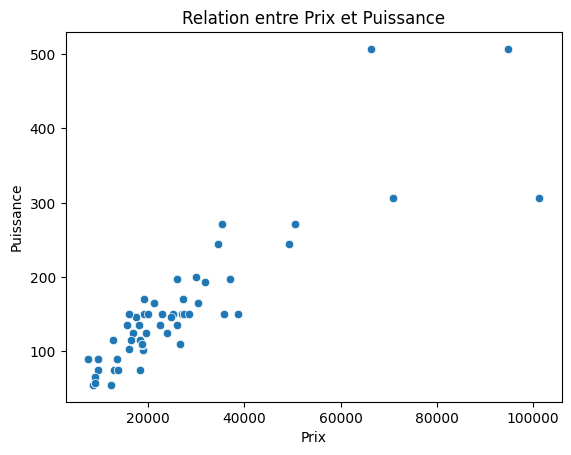

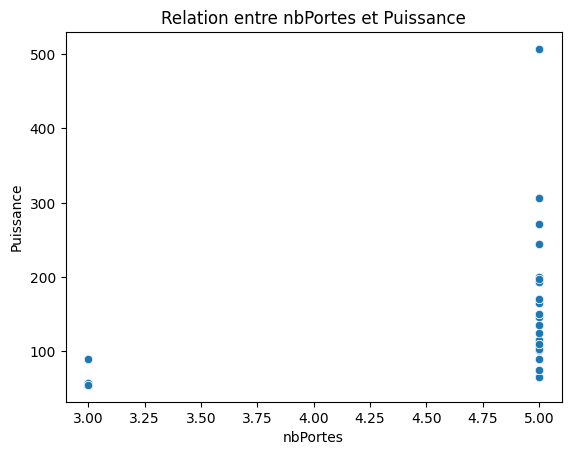

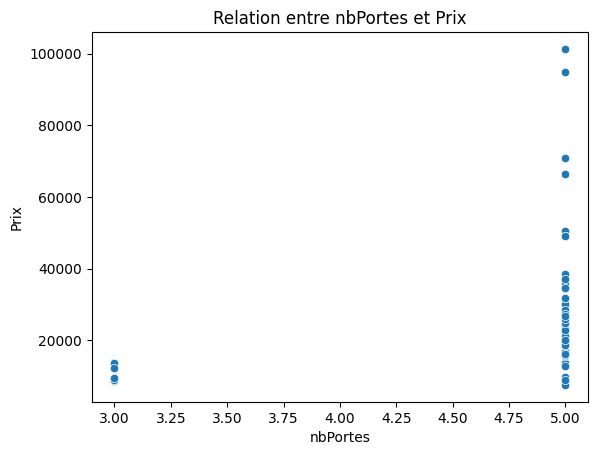

In [27]:
# Nuages de points pour explorer les relations entre les variables
if 'prix' in catalogue_pd.columns and 'puissance' in catalogue_pd.columns:
    plt.figure()
    sns.scatterplot(x=catalogue_pd['prix'], y=catalogue_pd['puissance'])
    plt.title('Relation entre Prix et Puissance')
    plt.xlabel('Prix')
    plt.ylabel('Puissance')
    plt.show()

if 'nbPortes' in catalogue_pd.columns and 'puissance' in catalogue_pd.columns:
    plt.figure()
    sns.scatterplot(x=catalogue_pd['nbPortes'], y=catalogue_pd['puissance'])
    plt.title('Relation entre nbPortes et Puissance')
    plt.xlabel('nbPortes')
    plt.ylabel('Puissance')
    plt.show()

if 'nbPortes' in catalogue_pd.columns and 'prix' in catalogue_pd.columns:
    plt.figure()
    sns.scatterplot(x=catalogue_pd['nbPortes'], y=catalogue_pd['prix'])
    plt.title('Relation entre nbPortes et Prix')
    plt.xlabel('nbPortes')
    plt.ylabel('Prix')
    plt.show()

In [28]:
# Sauvegarder les données nettoyées
catalogue.write.csv("data/processed/catalogue_processed.csv", header=True, mode="overwrite")
print("\nDonnées nettoyées sauvegardées dans 'catalogue_processed.csv'")


Données nettoyées sauvegardées dans 'catalogue_processed.csv'


In [29]:

# Stop Spark session
spark.stop()
